In [ ]:
# PCA 클래스
# 과일 사진의 경우 10000개의 픽셀이 있기 때문에, 10000개의 특성이 있다.
# 머신러닝은 10000개의 특성을 10000가의 차원이라고 한다.
# 차원을 줄이는 것은 저장공간을 크게 절약한다.
# 대표적인 차원 축소 알고리즘: 주성분 분석을 {PCA}라고 부른다.

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-04-05 00:46:52--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-04-05 00:46:52--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-04-05 00:46:52--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) # n은 샘플 개수입니다.
    # 한 줄에 10개씩 이미즈를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10)) # ceil 올림 함수, 만일 0.2면 1로 올림한다.
    # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
# (50, 10000) 결과가 나오면, 50개의 주성분을 찾고, 두번째 차원은 10000이다.
print(pca.components_.shape)

(50, 10000)


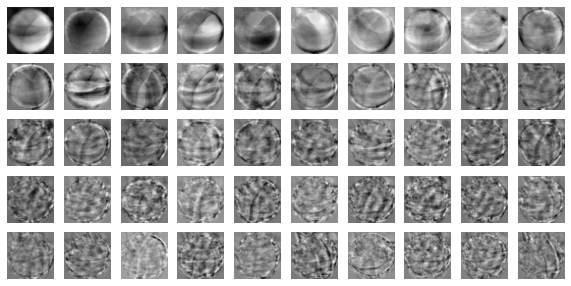

In [ ]:
# 주성분 50개의 화면을 확인
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
# (300, 10000)크기의 배열
# 10000개의 특성을 가진 300개의 이미지
print(fruits_2d.shape)

# 이것을 300, 50 크기의 배열로 변형한다.
# 50개의 특성을 가진 300개의 이미지로 변형
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [ ]:
# 줄어든 데이터를 다시 10000개로 원복(재구성)
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


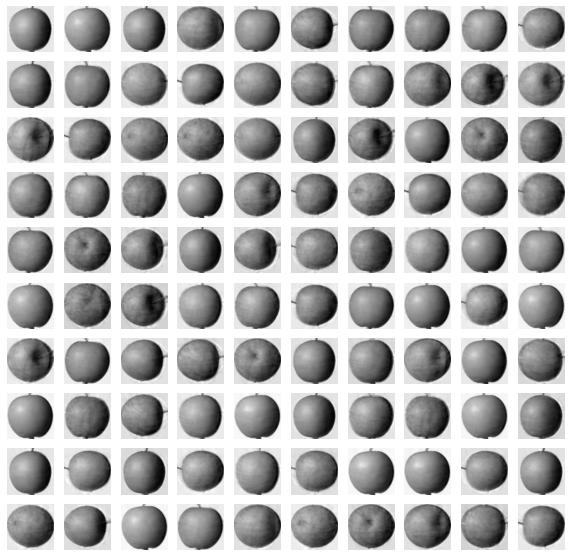

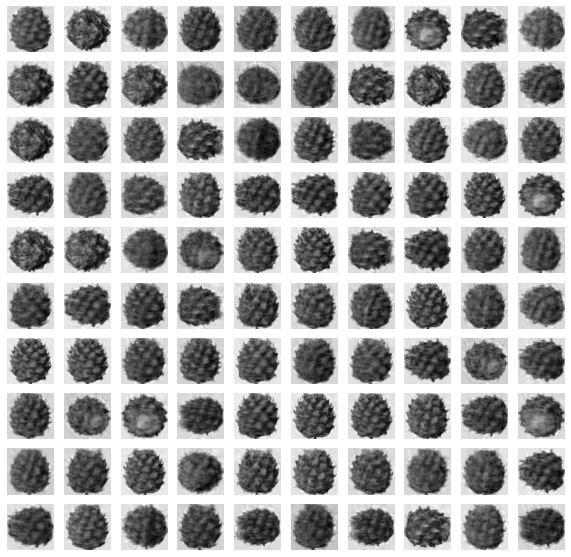

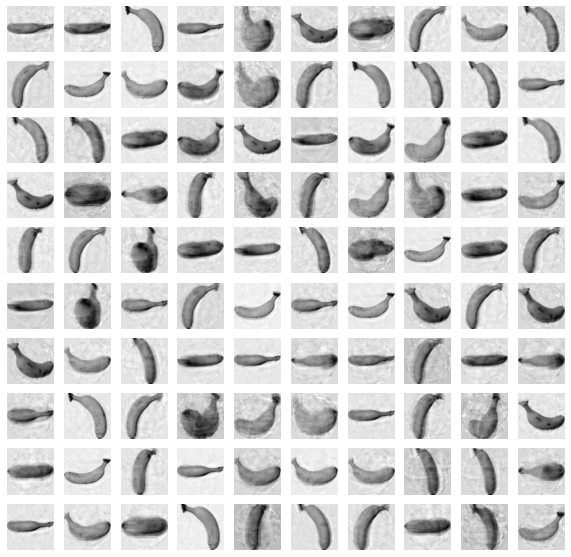

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [ ]:
# 설명된 분산 : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# 92% 분산을 유지하고 있다. 50개의 데이터가 모든 데이터의 92%를 표현하고 있다.
print(np.sum(pca.explained_variance_ratio_))

0.9215028357267644


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


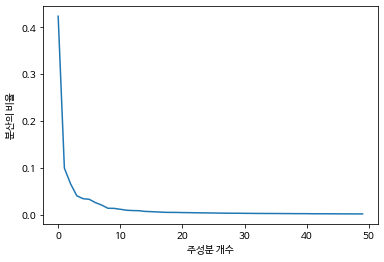

In [ ]:
# colab에서 한글 폰트 사용하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

# 주성분이 10건이 대부분이며, 나머지 건수는 늘려도 비율이 크게 늘어나지 않는다.
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("주성분 개수")
plt.ylabel("분산의 비율")
plt.show()

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511201
 0.00486382 0.00480347 0.00447835 0.00437316 0.00408035 0.00389475
 0.00372441 0.00359283 0.00331462 0.00317801 0.00304325 0.00303755
 0.00288793 0.00275693 0.00264935 0.00255842 0.00252025 0.00247367
 0.00239476 0.00230902 0.00221518 0.00216677 0.00213875 0.00196434
 0.001923   0.00190397 0.00183654 0.00180195 0.00171483 0.0016664
 0.00162835 0.00161493]


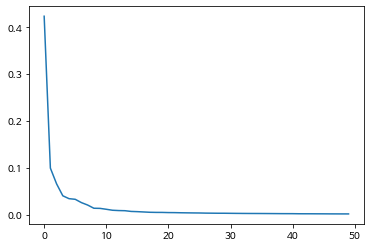

In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
# 다른 알고리즘 함께 사용하기
# '원본 데이터를 사용하는 것'과 'PCA를 통하여 생성한 데이터를 사용하는 것'의 차이를 알아본다.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 결과 array를 생성한다.
# 0인값 100개, 1인 값 100개, 2인값 100개
target = np.array([0]*100 +[1]*100 +[2]*100)

# 원본 데이터를 사용하여 교차 검증을 한다.
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score'])) # 교차 검증의 점수
print(np.mean(scores['fit_time']))  # 훈련 시간 (초)

0.9966666666666667
1.519108247756958


In [ ]:
# PCA 데이터를 사용하여 교차 검증을 사용한다.
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score'])) # 교차 검증의 점수
print(np.mean(scores['fit_time']))  # 훈련 시간 (초)

1.0
0.03747100830078125


In [ ]:
# 비교 결과 : PCA 데이터를 사용한 결과가 정확도 100%(1), 훈련시간은 0.0512로 30배 이상 감소함

In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

# 결과 : 주성분은 2개, 2개의 성분으로 0.5 즉 50%를 표현할 수 있다.
print(pca.n_components_)

# 차원 축소 : 원본 데이터를 줄임
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

2
(300, 2)


In [ ]:
# pca를 사용하여 score를 확인
# 결과 99% 정확도를 달성함
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.049585914611816405


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# 이번에는 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보겟습니다.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=24)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


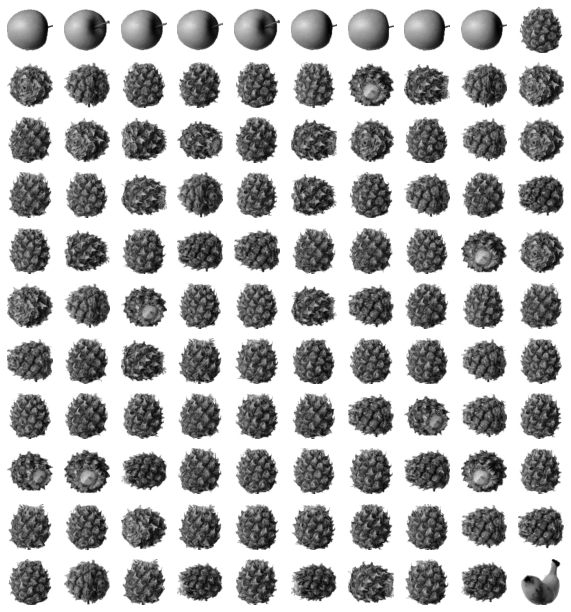

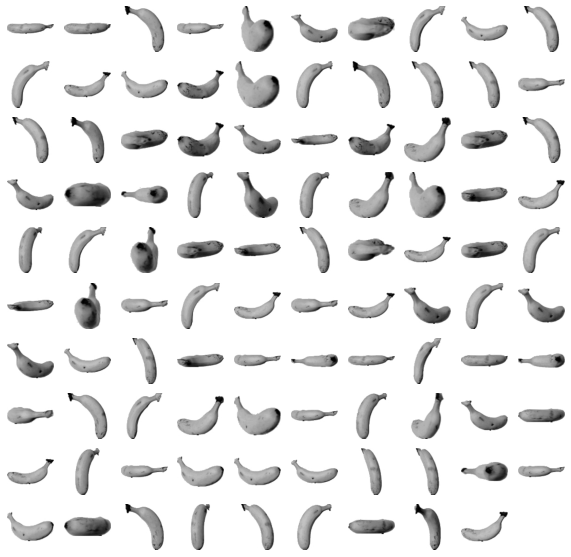

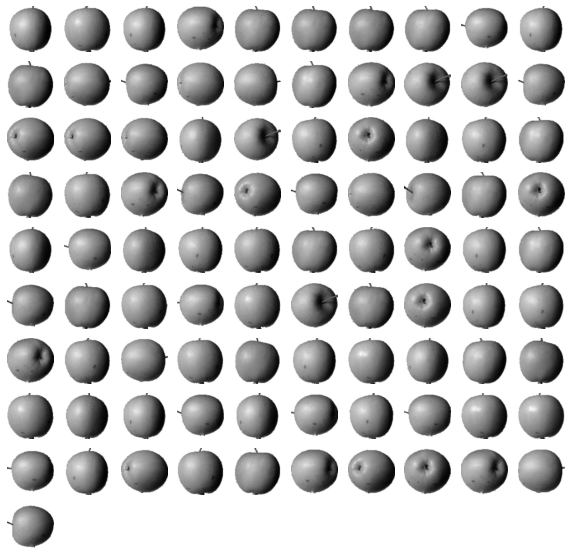

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


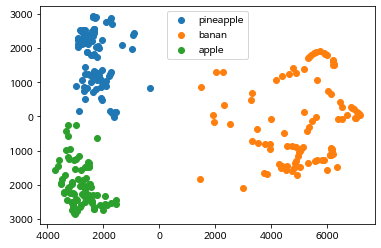

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banan',  'apple'])
plt.show()